This model illustrates one possible way to classify basic emotions using LOCAL BINARY PATTERN method, and combining it with SVM and trees in order to get good models. 

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split

In [2]:
# Using methods from other notebook
%run preprocessing_functions.ipynb

In [3]:
# Loading data
images, labels = load_data('datasets/ck+')

In [4]:
images.shape

(327, 48, 48)

In [5]:
print(images[0])

[[36  8  2 ... 25 48 64]
 [12  3  2 ... 11 29 61]
 [ 4  2  1 ... 11 16 54]
 ...
 [68 68 67 ... 78 78 77]
 [68 68 69 ... 78 77 77]
 [66 67 69 ... 76 77 76]]


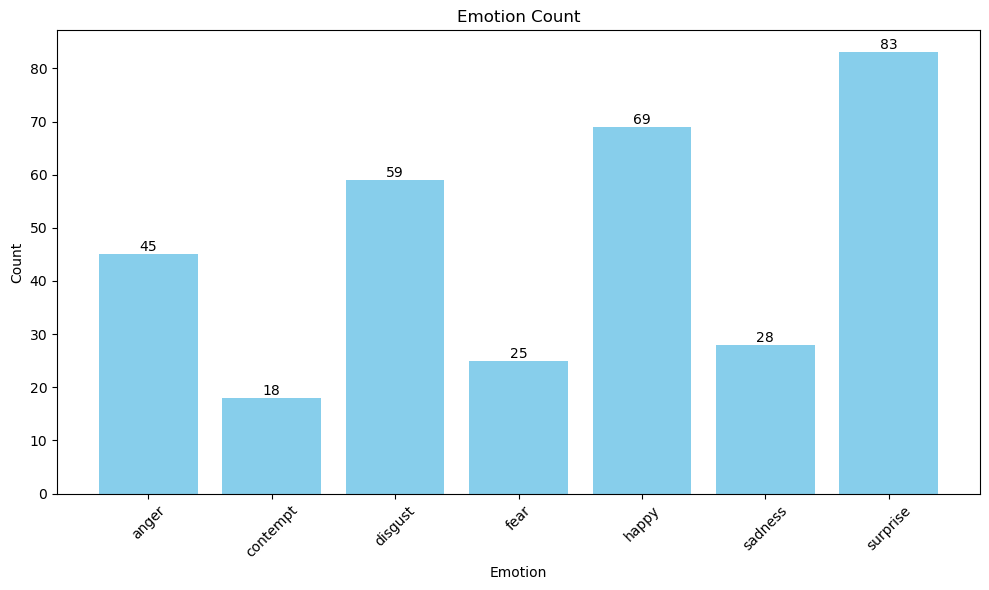

In [6]:
plot_count(images, labels)

In [7]:
# One possible way to make more data is to add mirrored images of faces
images, labels = add_mirror_images(images, labels, ["anger", "surprise", "disgust", "happy"])

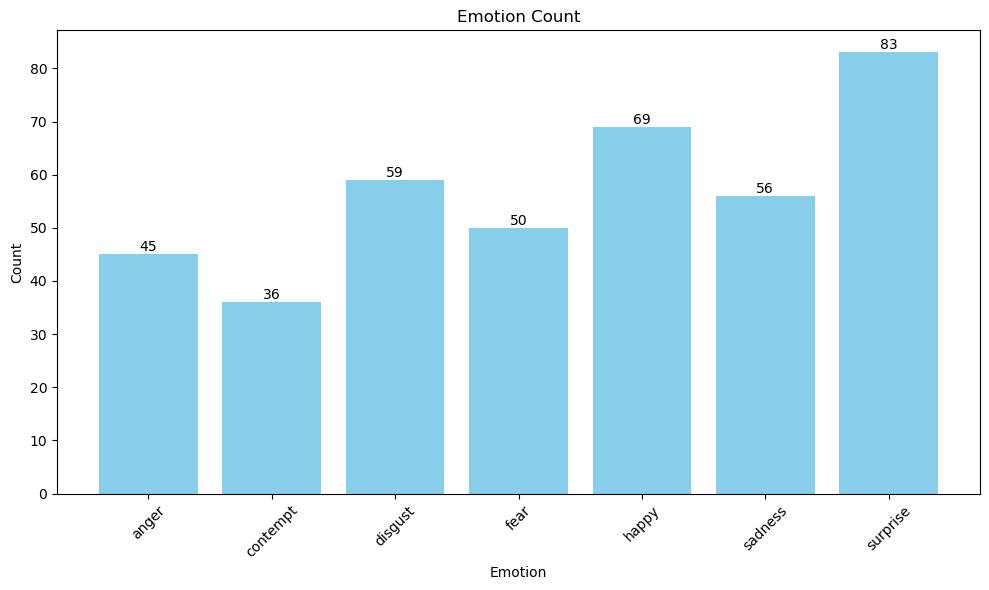

In [8]:
plot_count(images, labels)

In [9]:
images, labels = random_delete_upto(images, labels, "disgust", 55)
images, labels = random_delete_upto(images, labels, "happy", 55)
images, labels = random_delete_upto(images, labels, "sadness", 55)
images, labels = random_delete_upto(images, labels, "surprise", 55)

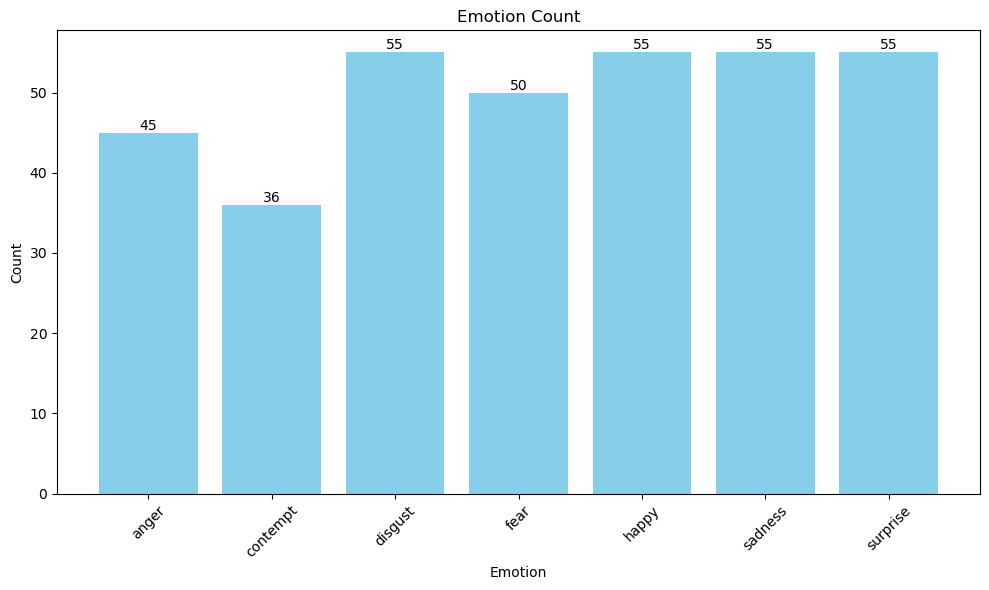

In [10]:
plot_count(images, labels)

In [11]:
images.shape

(351, 48, 48)

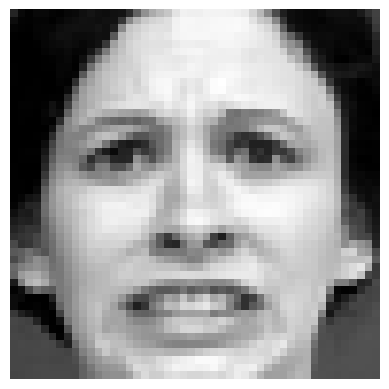

fear


In [12]:
plot_image(images[0], labels[0])

In [13]:
# Splitting the dataset into train, test and validation set

train_data, temp_data, train_labels, temp_labels = train_test_split(images, labels, test_size=0.3, random_state=12, stratify=labels)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.6, random_state=12, stratify=temp_labels)

In [14]:
print('Train size: ',  len(train_data))
print('Test size: ',  len(test_data))
print('Validation size: ',  len(val_data))

Train size:  245
Test size:  64
Validation size:  42


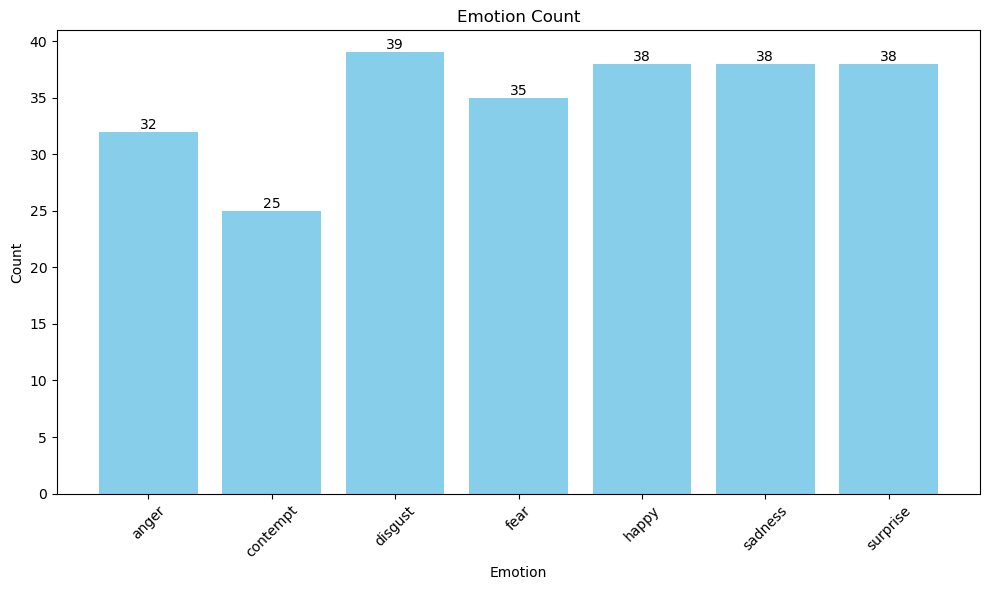

In [15]:
plot_count(train_data, train_labels)